# do not include in final doc

In [1]:
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
files  = glob.glob("./*training_log.tsv")
training_log = pd.concat([pd.read_csv(f, sep='\t') for f in files]).reset_index(drop=True).replace([np.inf, -np.inf], np.nan).dropna(how="all").drop('user_alpha', axis='columns')

training_log['percent_better'] *= 0.33

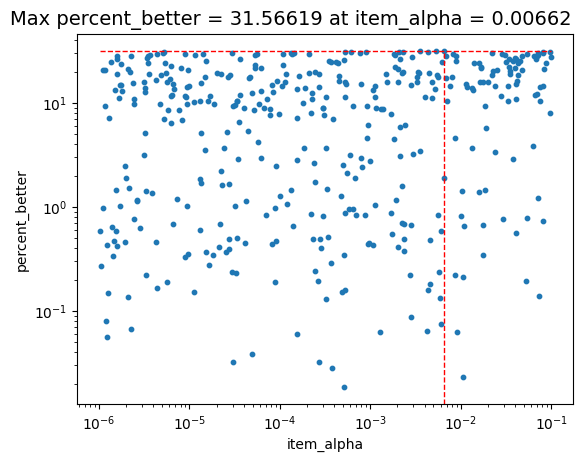

In [6]:
XLABEL = 'item_alpha'
YLABEL = 'percent_better'

fig, ax = plt.subplots()
ax.scatter(training_log[XLABEL], training_log[YLABEL], s=10)
ax.set_xlabel(XLABEL)
ax.set_ylabel(YLABEL)
ax.set_xscale('log')
ax.set_yscale('log')
best_idx = training_log[YLABEL].idxmax(axis='rows')
ax.hlines(y=training_log[YLABEL].max(), xmin=training_log[XLABEL].min(), xmax=training_log[XLABEL].max(),  linewidth=1, linestyles='--', colors='r')
ax.vlines(x=training_log[XLABEL].iloc[best_idx], ymin=training_log[YLABEL].min(), ymax=training_log[YLABEL].max(),  linewidth=1, linestyles='--', colors='r')
fig.text(0.02, 0.9, f"Max {YLABEL} = {training_log[YLABEL].iloc[best_idx]:.5f} at {XLABEL} = {training_log[XLABEL].iloc[best_idx]:.5f}", fontsize=14, transform=plt.gcf().transFigure)
plt.show()


In [9]:
from IPython.display import display

N = 20
n_best = training_log[(training_log.auc_test > 0.7)].nlargest(N, columns=['percent_better'])
display(n_best)
summary = pd.concat([n_best.mean().rename('mean'), n_best.std().rename('std')], axis='columns').loc[[
    'learning_rate', 
    'item_alpha',
    'no_components',
    'auc_test',
    'clustering_fm',
    'clustering_base',
    'percent_better'
]]
display(summary)

,learning_rate,item_alpha,no_components,epochs,auc_train,auc_test,precision_train,precision_test,recall_train,recall_test,reciprocal_rank_train,reciprocal_rank_test,clustering_fm,clustering_base,percent_better,time_elapsed
277,0.003349,0.006620,60,10,0.924165,0.924649,0.33234,0.23072,0.023747,0.096313,0.508143,0.336810,0.021450,0.493690,31.566186,292.386743
152,0.001513,0.003547,43,10,0.911311,0.911477,0.30978,0.22358,0.023180,0.095276,0.481074,0.315475,0.015396,0.348918,31.543860,228.147149
336,0.002018,0.005273,79,10,0.920205,0.920529,0.32652,0.22854,0.023653,0.096543,0.491061,0.327693,0.023830,0.507903,31.451704,376.846135
171,0.002833,0.002292,64,10,0.923493,0.923973,0.32112,0.22698,0.023560,0.095395,0.492963,0.330041,0.030899,0.593984,31.283352,287.575260
286,0.006439,0.096851,69,10,0.758924,0.756325,0.00720,0.00186,0.000147,0.000164,0.031506,0.013804,0.048218,0.834659,31.093581,336.199421
507,0.004732,0.004305,50,10,0.925358,0.925757,0.32984,0.23138,0.023516,0.096053,0.507993,0.332223,0.032309,0.551303,31.066064,244.689135
254,0.002295,0.002057,57,10,0.921877,0.922280,0.32204,0.22732,0.023549,0.095484,0.487878,0.327360,0.036469,0.604511,31.009168,283.656675
45,0.002323,0.000887,60,10,0.921692,0.922001,0.31172,0.22206,0.023123,0.094616,0.479607,0.318645,0.042129,0.672373,30.932314,287.197057
245,0.003251,0.000619,72,10,0.925641,0.926126,0.32774,0.23022,0.023559,0.095796,0.512108,0.339090,0.044060,0.694089,30.905192,308.779497
257,0.002930,0.000526,79,10,0.925538,0.925946,0.33618,0.23124,0.024102,0.095944,0.514044,0.335288,0.048004,0.735799,30.847045,333.676052


,mean,std
learning_rate,0.003744,0.002433
item_alpha,0.014971,0.030164
no_components,60.800000,12.812823
auc_test,0.896905,0.065242
clustering_fm,0.044391,0.019299
clustering_base,0.640589,0.191492
percent_better,30.769928,0.482600


In [10]:
print(summary.to_latex(escape=True, index=True))

\begin{tabular}{lrr}
\toprule
 & mean & std \\
\midrule
learning\_rate & 0.003744 & 0.002433 \\
item\_alpha & 0.014971 & 0.030164 \\
no\_components & 60.800000 & 12.812823 \\
auc\_test & 0.896905 & 0.065242 \\
clustering\_fm & 0.044391 & 0.019299 \\
clustering\_base & 0.640589 & 0.191492 \\
percent\_better & 30.769928 & 0.482600 \\
\bottomrule
\end{tabular}
